# Linear Regression Naive

In [1]:
import pandas as pd 
import os 

csv_file = 'airline_ticket_dataset.csv'

data = pd.read_csv(csv_file)
data.describe()

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
count,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,1.399700e+04,13997.000000,13997.000000,1.397900e+04,13979.000000,13979.000000
mean,2023.285633,2.357112,31506.638889,32300.714296,1061.839617,1024.581762,237.699035,0.566322,245.713270,0.327737,180.954832,3.220308e+06,0.836383,-0.007360,2.955601e+06,0.832683,-0.038586
std,1.030128,1.108776,1214.185463,1421.194815,589.956663,1475.981346,63.929831,0.174240,77.518173,0.228027,69.241252,2.319576e+06,0.141082,0.108333,2.014224e+06,0.142587,0.119825
min,2022.000000,1.000000,30135.000000,30189.000000,129.000000,163.000000,76.770000,0.209700,76.770000,0.010000,66.160000,2.993000e+04,0.000000,-0.619400,5.464000e+04,0.000000,-0.641100
25%,2022.000000,1.000000,30529.000000,30852.000000,604.000000,316.000000,193.087500,0.431800,193.357500,0.154500,119.590000,1.224800e+06,0.793600,-0.051600,1.582850e+06,0.788400,-0.077500
50%,2023.000000,2.000000,31057.000000,32211.000000,936.000000,526.000000,227.640000,0.541600,239.245000,0.265550,175.215000,2.873210e+06,0.865900,-0.003200,2.764620e+06,0.863200,-0.022700
75%,2024.000000,3.000000,32244.000000,33342.000000,1404.000000,1086.250000,275.615000,0.676725,293.952500,0.444300,225.875000,4.254110e+06,0.922500,0.048400,3.661990e+06,0.939300,0.040500
max,2025.000000,4.000000,35412.000000,35628.000000,2724.000000,21058.000000,676.890000,1.000000,679.120000,1.000000,669.740000,8.840080e+06,1.000000,0.965900,8.840080e+06,1.000000,0.350800


## Visualizing QQPlot 

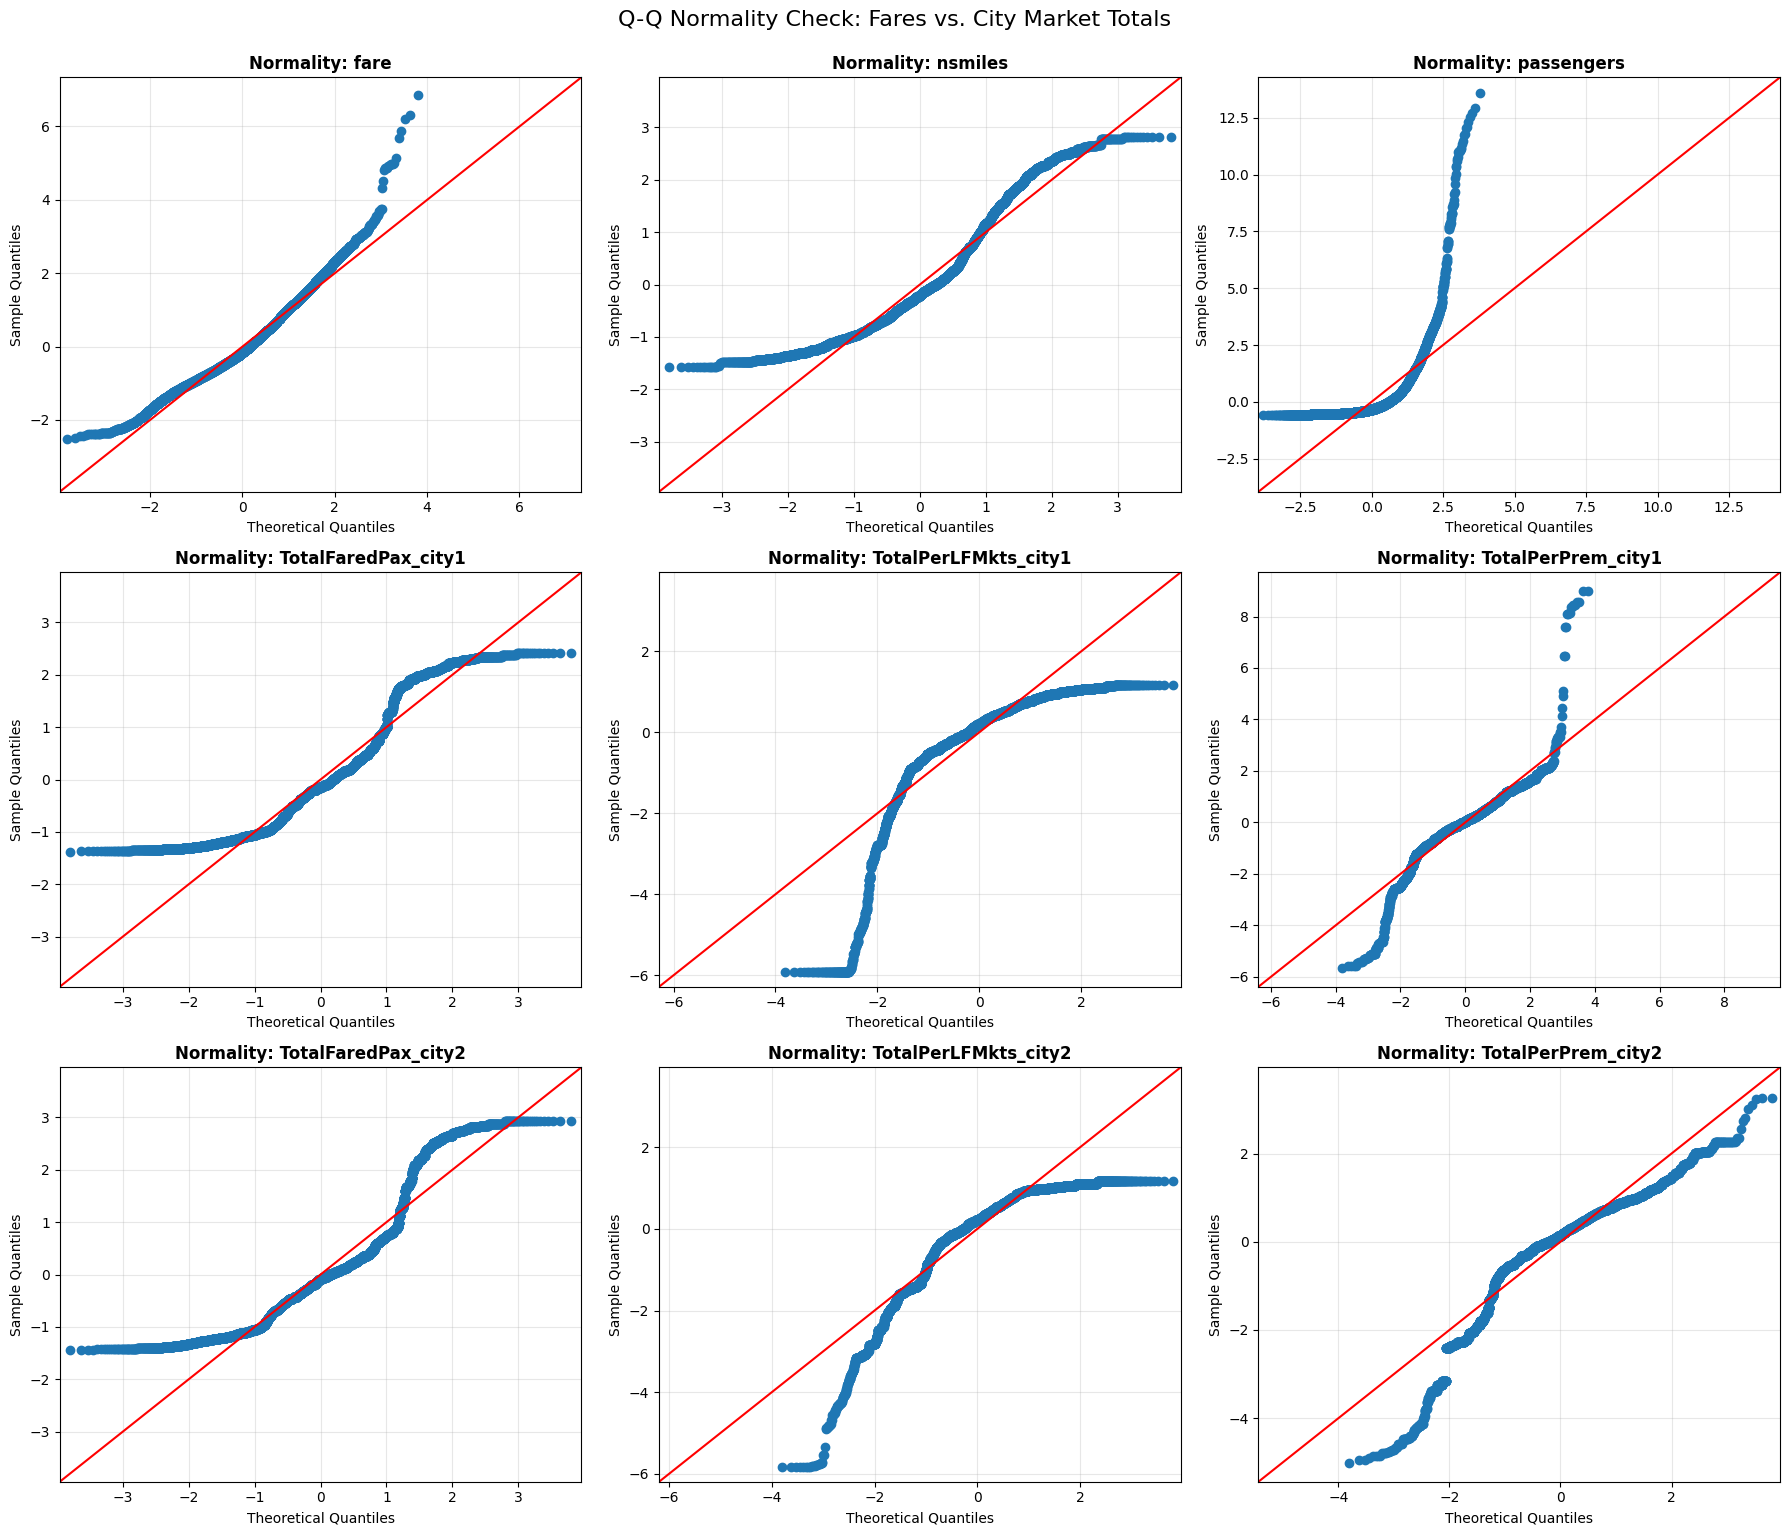

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

cols_to_check = [
    'fare', 'nsmiles', 'passengers', 
    'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
    'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2'
]

# Create a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    if col in data.columns:
        # Drop NaNs and ensure data is numeric
        clean_data = pd.to_numeric(data[col], errors='coerce').dropna()
        
        # Plotting with the 45-degree reference line
        sm.qqplot(clean_data, line='45', fit=True, ax=axes[i])
        
        axes[i].set_title(f'Normality: {col}', fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
    else:
        # Hide the subplot if the column name doesn't exist
        axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Q-Q Normality Check: Fares vs. City Market Totals', fontsize=16, y=1.02)
plt.show()

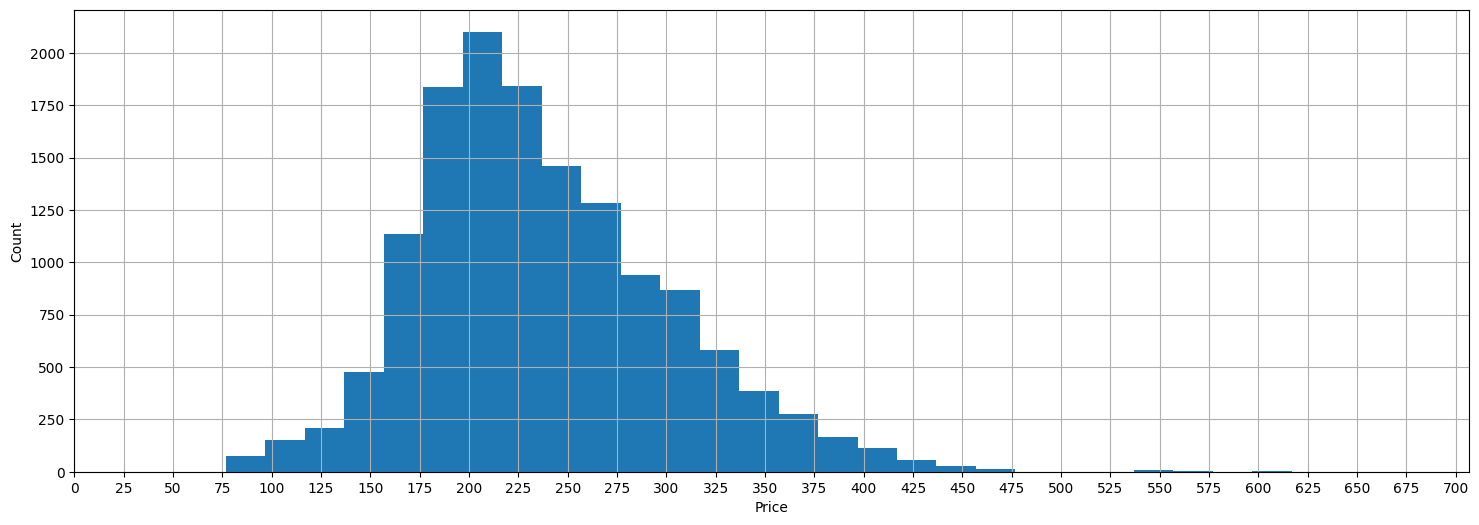

In [3]:
fig, ax = plt.subplots(figsize=(18, 6))
data['fare'].hist(ax=ax, bins=30)

xmin, xmax = ax.get_xlim()
ax.set_xticks(np.arange(0, xmax, 25))

plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

## Clean Data

In [4]:
# Combine first
model_df = data[['Year', 'quarter', 'fare', 'nsmiles', 'passengers',
                 'large_ms', 'fare_lg', 'lf_ms', 'fare_low',
                 'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1',
                 'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2']].copy()

# Convert to numeric
model_df = model_df.apply(pd.to_numeric, errors='coerce')

# Drop inf
model_df = model_df.replace([np.inf, -np.inf], np.nan)

# Drop rows with any missing values
model_df = model_df.dropna()

## Plot to check for lin reg

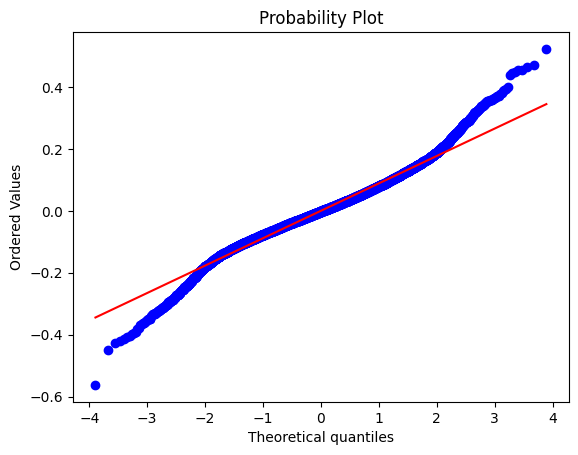

In [5]:
y = np.log1p(model_df['fare'])
X = model_df.drop(columns=['fare'])

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

In [6]:
print(model.resid.describe())
print(model.resid.var())
print(y.nunique())
print(y.describe())

count    1.397200e+04
mean     4.483193e-12
std      8.951546e-02
min     -5.623114e-01
25%     -5.209726e-02
50%     -2.053860e-03
75%      5.009482e-02
max      5.227807e-01
dtype: float64
0.008013017879860139
10311
count    13972.000000
mean         5.441007
std          0.267529
min          4.353756
25%          5.269558
50%          5.433110
75%          5.623151
max          6.518985
Name: fare, dtype: float64


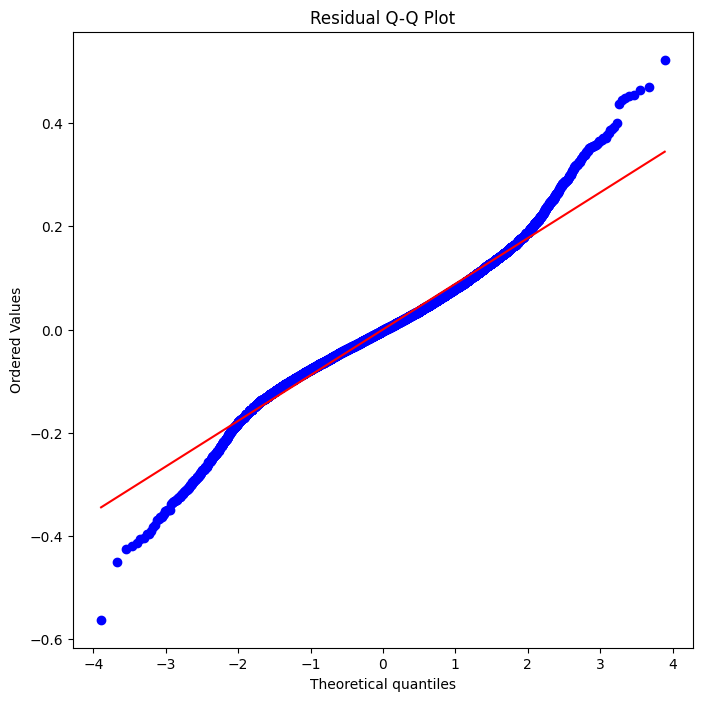

In [7]:
import matplotlib.pyplot as plt

resid = model.resid

fig, ax = plt.subplots(figsize=(8, 8))
stats.probplot(resid, dist="norm", plot=ax)

ax.set_title("Residual Q-Q Plot")
plt.show()

# Check heteroscedasticity

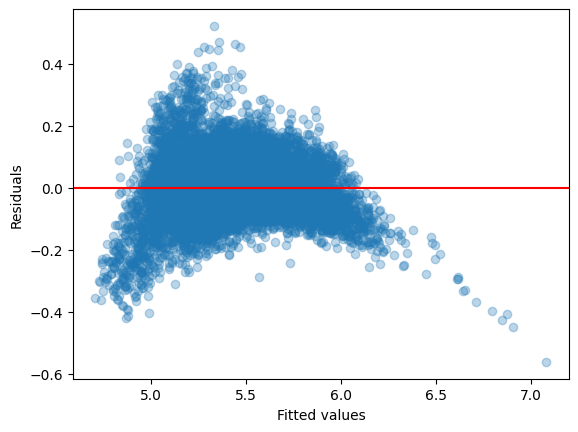

In [8]:
plt.scatter(model.fittedvalues, model.resid, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

## Setting up targets and features

We tackle this by introducing feature engineering, adding columns to the dataframe for better feedback

### Feature Engineering 

In [9]:
# Engineered features
model_df['fare_spread'] = model_df['fare_lg'] - model_df['fare_low']
model_df['fare_ratio'] = model_df['fare_lg'] / model_df['fare_low']
model_df['ms_diff'] = model_df['large_ms'] - model_df['lf_ms']
model_df['demand_density'] = model_df['passengers'] / model_df['nsmiles']
model_df['total_fared_pax'] = model_df['TotalFaredPax_city1'] + model_df['TotalFaredPax_city2']
model_df['pax_asymmetry'] = model_df['TotalFaredPax_city1'] / model_df['TotalFaredPax_city2']

## Partition training Data 

We perform partition training data to be from 2022 to 2023. Then we set 2024 to be the validation, and finally 2025 
to be test set. Our intuition is to see how the model react to future unseen event. 

In [10]:
train_df = model_df[(model_df['Year'] >= 2022) & (model_df['Year'] <= 2023)]
val_df   = model_df[model_df['Year'] == 2024]
test_df  = model_df[model_df['Year'] == 2025]

In [11]:
features = ['nsmiles', 'passengers', 'large_ms', 'lf_ms',
            'fare_spread', 'fare_ratio', 'ms_diff',
            'demand_density', 'total_fared_pax', 'pax_asymmetry',
            'TotalPerLFMkts_city1', 'TotalPerLFMkts_city2',
            'TotalPerPrem_city1', 'TotalPerPrem_city2',
            'quarter']

# Log-transform target
y_train = np.log1p(train_df['fare'])
y_val   = np.log1p(val_df['fare'])
y_test  = np.log1p(test_df['fare'])

X_train = train_df[features]
X_val   = val_df[features]
X_test  = test_df[features]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

## Train linear regression

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Validation

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred = model.predict(X_val_scaled)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("Validation RMSE (log space):", rmse_val)
print("Validation R²:", r2_val)

Validation RMSE (log space): 0.14239655875816434
Validation R²: 0.6679863474501341


In [15]:
y_val_pred_dollar = np.expm1(y_val_pred)
y_val_dollar      = np.expm1(y_val)

rmse_val_dollar = np.sqrt(mean_squared_error(y_val_dollar, y_val_pred_dollar))
print("Validation RMSE ($):", rmse_val_dollar)

Validation RMSE ($): 33.265203502364045


## Conclusion for Linear Regression 
The validation R^2 is pretty low, so we see that the linear regression does not seem to work well with the data set. We can try other models. 

## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_val_pred_ridge  = ridge.predict(X_val_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
r2_val = r2_score(y_val, y_val_pred_ridge)
r2_test = r2_score(y_test, y_test_pred_ridge)

print(f"Validation RMSE (log): {rmse_val:.3f}, R²: {r2_val:.3f}")
print(f"Test RMSE (log): {rmse_test:.3f}, R²: {r2_test:.3f}\n")

Validation RMSE (log): 0.142, R²: 0.668
Test RMSE (log): 0.167, R²: 0.555



## Tree 

In [17]:
from sklearn.ensemble import HistGradientBoostingRegressor

tree = HistGradientBoostingRegressor(max_iter=500)
tree.fit(X_train_scaled, y_train)
y_val_pred_tree  = tree.predict(X_val_scaled)
y_test_pred_tree = tree.predict(X_test_scaled)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred_tree))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
r2_val = r2_score(y_val, y_val_pred_tree)
r2_test = r2_score(y_test, y_test_pred_tree)

print(f"Validation RMSE (log): {rmse_val:.3f}, R²: {r2_val:.3f}")
print(f"Test RMSE (log): {rmse_test:.3f}, R²: {r2_test:.3f}\n")

Validation RMSE (log): 0.092, R²: 0.861
Test RMSE (log): 0.109, R²: 0.812



## Neural Net

In [18]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
nn.fit(X_train_scaled, y_train)
y_val_pred_nn  = nn.predict(X_val_scaled)
y_test_pred_nn = nn.predict(X_test_scaled)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred_nn))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
r2_val = r2_score(y_val, y_val_pred_nn)
r2_test = r2_score(y_test, y_test_pred_nn)

print(f"Validation RMSE (log): {rmse_val:.3f}, R²: {r2_val:.3f}")
print(f"Test RMSE (log): {rmse_test:.3f}, R²: {r2_test:.3f}")

Validation RMSE (log): 0.117, R²: 0.776
Test RMSE (log): 0.129, R²: 0.734


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=42)
rf.fit(X_train_scaled, y_train)
y_val_pred_rf  = rf.predict(X_val_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_val = r2_score(y_val, y_val_pred_rf)
r2_test = r2_score(y_test, y_test_pred_rf)

print(f"Validation RMSE (log): {rmse_val:.3f}, R²: {r2_val:.3f}")
print(f"Test RMSE (log): {rmse_test:.3f}, R²: {r2_test:.3f}")

## XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train_scaled, y_train)

y_val_pred_xgb  = xgb.predict(X_val_scaled)
y_test_pred_xgb = xgb.predict(X_test_scaled)

rmse_val_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"Validation RMSE (log): {rmse_val_xgb:.3f}, R²: {r2_val_xgb:.3f}")
print(f"Test RMSE (log): {rmse_test_xgb:.3f}, R²: {r2_test_xgb:.3f}")

## Extra Tree 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extratree = ExtraTreesRegressor(n_estimators=500, random_state=42)
extratree.fit(X_train_scaled, y_train)

y_val_pred_et  = extratree.predict(X_val_scaled)
y_test_pred_et = extratree.predict(X_test_scaled)

rmse_val_et = np.sqrt(mean_squared_error(y_val, y_val_pred_et))
rmse_test_et = np.sqrt(mean_squared_error(y_test, y_test_pred_et))
r2_val_et = r2_score(y_val, y_val_pred_et)
r2_test_et = r2_score(y_test, y_test_pred_et)

print(f"Validation RMSE (log): {rmse_val_et:.3f}, R²: {r2_val_et:.3f}")
print(f"Test RMSE (log): {rmse_test_et:.3f}, R²: {r2_test_et:.3f}")